In [20]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from geoband.API import *
import folium
import json
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os
current_path = os.getcwd()
current_path
import matplotlib as mpl
import matplotlib.font_manager as fm
import statistics

# fetch the name of font that was installed
path = current_path+'/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path)

import geoplot as gplt
import geoplot.crs as gcrs
import imageio
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc

import random
from functools import reduce
from collections import defaultdict
import folium
import shapely
from IPython.display import display
from tqdm.notebook import tqdm
import sklearn.cluster
import tensorflow as tf
import pydeck as pdk
import cufflinks as cf 
cf.go_offline(connected=True)
cf.set_config_file(theme='polar')
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from shapely.geometry import Polygon, Point, mapping
from numpy import random

#최적화 solver
import time
from mip import Model, xsum, maximize, BINARY  

import matplotlib.font_manager as font_manager

font_dirs = [current_path, ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams["font.family"] = 'Nanum Gothic'
mpl.rcParams['font.family'] = 'NanumBarunGothic'
from shapely import wkt
import geopy.distance
import ast
import geog
import shapely.geometry
from area import area
from geopandas import GeoDataFrame

In [2]:
# 데이터 입력
# 데이터 입력 시 용이성을 위해 df_##으로 이름 지정

df_01 = pd.read_csv(current_path+'/input/1.수원시_버스정류장.csv')
df_02 = pd.read_csv(current_path+'/input/2.수원시_버스정류장별_승하차이력(1).csv')
df_03 = pd.read_csv(current_path+'/input/3.수원시_버스정류장별_승하차이력(2).csv')
df_04 = pd.read_csv(current_path+'/input/4.수원시_버스정류장별_승하차이력(3).csv')
df_05 = pd.read_csv(current_path+'/input/5.수원시_버스정류장별_승하차이력(4).csv')
df_06 = pd.read_csv(current_path+'/input/6.수원시_버스정류장별_승하차이력(5).csv')
df_07 = pd.read_csv(current_path+'/input/7.수원시_버스정류장별_노선현황.csv')
df_08 = pd.read_csv(current_path+'/input/8.수원시_지하철역_위치정보.csv')
df_09 = pd.read_csv(current_path+'/input/9.수원시_지하철역별_이용현황(2017~2019).csv')
df_10 = pd.read_csv(current_path+'/input/10.수원시_옥외광고물현황.csv')
df_11 = pd.read_csv(current_path+'/input/11.수원시_대기오염도_측정현황.csv')
df_12 = pd.read_csv(current_path+'/input/12.수원시_주차장현황.csv')
df_13 = pd.read_csv(current_path+'/input/13.수원시_기상데이터(2020).csv')
df_14 = pd.read_csv(current_path+'/input/14.수원시_시간대별_유동인구(2020).csv')
df_15 = pd.read_csv(current_path+'/input/15.수원시_성연령별_유동인구(2020).csv')
df_16 = pd.read_csv(current_path+'/input/16.수원시_요일별_유동인구(2020).csv')
df_17 = gpd.read_file(current_path+'/input/17.수원시_인구정보(고령)_격자.geojson')
df_18 = gpd.read_file(current_path+'/input/18.수원시_인구정보(생산가능)_격자.geojson')
df_19 = gpd.read_file(current_path+'/input/19.수원시_인구정보(유소년)_격자.geojson')
df_20 = gpd.read_file(current_path+'/input/20.수원시_교통노드.geojson')
df_21 = gpd.read_file(current_path+'/input/21.수원시_교통링크.geojson')
df_22 = gpd.read_file(current_path+'/input/22.수원시_상세도로망_LV6.geojson')
df_23 = pd.read_csv(current_path+'/input/23.수원시_평일_일별_시간대별_추정교통량_LV6.csv')
df_24 = pd.read_csv(current_path+'/input/24.수원시_평일_일별_혼잡빈도강도_LV6.csv')
df_25 = pd.read_csv(current_path+'/input/25.수원시_평일_일별_혼잡시간강도_LV6.csv')
df_26 = gpd.read_file(current_path+'/input/26.수원시_인도(2017).geojson')
df_27 = gpd.read_file(current_path+'/input/27.수원시_도로명주소(건물).geojson')
df_28 = gpd.read_file(current_path+'/input/28.수원시_건물연면적_격자.geojson')
df_29 = gpd.read_file(current_path+'/input/29.수원시_법정경계(시군구).geojson')
df_30 = gpd.read_file(current_path+'/input/30.수원시_법정경계(읍면동).geojson')
df_31 = gpd.read_file(current_path+'/input/31.수원시_행정경계(읍면동).geojson')
df_32 = gpd.read_file(current_path+'/input/32.수원시_지적도.geojson')

In [7]:
def line_string_to_coordinates(line_string): 
    if isinstance(line_string, shapely.geometry.linestring.LineString): 
        lon, lat = line_string.xy 
        return [[x, y] for x, y in zip(lon, lat)] 
    elif isinstance(line_string, shapely.geometry.multilinestring.MultiLineString): 
        ret = [] 
        for i in range(len(line_string)): 
            lon, lat = line_string[i].xy 
            for x, y in zip(lon, lat): 
                ret.append([x, y])
        return ret 

def multipolygon_to_coordinates(x): 
    lon, lat = x[0].exterior.xy 
    return [[x, y] for x, y in zip(lon, lat)] 

def polygon_to_coordinates(x): 
    lon, lat = x.exterior.xy 
    return [[x, y] for x, y in zip(lon, lat)] 

# 중심점 
def multipolygon_to_center_coordinates(x): 
    lon, lat = x[0].centroid.xy 
    return [[x, y] for x, y in zip(lon, lat)]

def polygon_to_center_coordinates(x): 
    lon, lat = x.centroid.xy
    return [[x, y] for x, y in zip(lon, lat)] 

In [ ]:
def linestring_to_polygon(fili_shps):
    gdf = gpd.read_file(fili_shps) #LINESTRING
    gdf['geometry'] = [Polygon(mapping(x)['coordinates']) for x in gdf.geometry]
    return gdf

## df_01 ~ df_07 합치기

In [3]:
#수원시_버스정류장
df_01.head(2)

정류장ID   정류장명  정류장유형 환승역타입        위치(동)   쉘터  BIS설치여부  LED  LCD  LED+LCD복합형  알뜰형  임대형(음성)         lon        lat
0  201000313   권선구청  시내,마을    일반  경기도 수원시 서둔동  1.0      1.0  1.0  NaN         NaN  NaN      NaN  126.970983  37.256983
1  201000344  중보들공원  시내,마을    일반   경기도 수원시 평동  1.0      NaN  NaN  NaN         NaN  NaN      NaN  126.991029  37.244605

In [158]:
df_01.정류장유형.value_counts()

시내          775
시내,마을       368
시내,마을,시외     20
시내,시외         7
시내,공항         4
시내,마을,공항      3
시내,시외,공항      2
Name: 정류장유형, dtype: int64

In [136]:
df_01.BIS설치여부.value_counts()

1.0    928
Name: BIS설치여부, dtype: int64

In [137]:
df_01.shape

(1179, 14)

In [138]:
no_bis = df_01[df_01.BIS설치여부.isna()]
no_bis.shape

(251, 14)

In [3]:
token = "pk.eyJ1IjoiZGx3b3FsczQzMjMiLCJhIjoiY2tscnR3bG95MDJwaDJ2bjUzcTBrc3h4cyJ9.WigDFX0Gm612haaz4zQ2hg"

In [4]:
gu = pdk.Layer( 'GeoJsonLayer',
                    df_29,
                    opacity = 0.7,
                    stroked = True,
                    filled = False,
                    extruded = False, 
                    wireframe = True,
                    lineWidthScale = 70,
                    get_line_color=[215, 210, 210]
                   )

dong = pdk.Layer( 'GeoJsonLayer',
                    df_31,
                    opacity = 0.7,
                    stroked = True,
                    filled = False,
                    extruded = False, 
                    wireframe = True,
                    lineWidthScale = 50,
                    get_line_color=[0, 0, 0]
                   )

In [5]:
bus_layer2 = pdk.Layer(
    'ScatterplotLayer',
    df_01,
    get_position='[lon, lat]',
    get_radius=30,
    opacity=0.7, 
    line_width_min_pixels=1, 
    get_fill_color='[205, 0, 0]', 
    get_line_color='[0, 0, 0]', 
    pickable=True,
    auto_highlight=True
)

In [8]:
df_18['coordinates'] = df_18['geometry'].apply(multipolygon_to_coordinates)

In [10]:
df_18.loc[0]["coordinates"]

[[126.92589305000297, 37.27122188401471],
 [126.92588620572832, 37.272123240203285],
 [126.92701407912415, 37.27212870465317],
 [126.92702090995468, 37.271227348287326],
 [126.92589305000297, 37.27122188401471]]

In [13]:
df_18.loc[10]["coordinates"]

[[126.92695258796418, 37.28024090570642],
 [126.92694575409226, 37.28114226068573],
 [126.92807376226625, 37.281147716160326],
 [126.92808058268805, 37.28024636100407],
 [126.92695258796418, 37.28024090570642]]

In [15]:
df_26['coordinates'] = df_26['geometry'].apply(line_string_to_coordinates)

In [16]:
df_26.head()

UFID  WIDT    QUAL    BYYN    KIND                                           geometry                                        coordinates
0  1000037612070A00310000000000154767   0.0  SWQ001  BYC001  SWK002  MULTILINESTRING ((126.98492 37.32861, 126.9849...  [[126.98492477104054, 37.32861429173025], [126...
1  1000037612070A00310000000000154768   0.0  SWQ001  BYC001  SWK002  MULTILINESTRING ((126.98567 37.32644, 126.9857...  [[126.98567135163154, 37.32643671936139], [126...
2  1000037612070A00310000000000154769   0.0  SWQ001  BYC001  SWK002  MULTILINESTRING ((126.98459 37.32839, 126.9849...  [[126.98458621654031, 37.32839471386689], [126...
3  1000037612070A00310000000000154793   3.0  SWQ003  BYC001  SWK001  MULTILINESTRING ((126.98565 37.32643, 126.9856...  [[126.98565272370675, 37.326431994479215], [12...
4  1000037612070A00310000000000154794   3.0  SWQ003  BYC001  SWK001  MULTILINESTRING ((126.98461 37.32840, 126.9847...  [[126.98460747532971, 37.32840442338037], [126...

In [33]:
df_26.head()

UFID  WIDT    QUAL    BYYN    KIND                                           geometry                                        coordinates
0  1000037612070A00310000000000154767   0.0  SWQ001  BYC001  SWK002  MULTILINESTRING ((126.98492 37.32861, 126.9849...  [[126.98492477104054, 37.32861429173025], [126...
1  1000037612070A00310000000000154768   0.0  SWQ001  BYC001  SWK002  MULTILINESTRING ((126.98567 37.32644, 126.9857...  [[126.98567135163154, 37.32643671936139], [126...
2  1000037612070A00310000000000154769   0.0  SWQ001  BYC001  SWK002  MULTILINESTRING ((126.98459 37.32839, 126.9849...  [[126.98458621654031, 37.32839471386689], [126...
3  1000037612070A00310000000000154793   3.0  SWQ003  BYC001  SWK001  MULTILINESTRING ((126.98565 37.32643, 126.9856...  [[126.98565272370675, 37.326431994479215], [12...
4  1000037612070A00310000000000154794   3.0  SWQ003  BYC001  SWK001  MULTILINESTRING ((126.98461 37.32840, 126.9847...  [[126.98460747532971, 37.32840442338037], [126...

In [35]:
width4 = df_26[df_26.WIDT >= 4]

In [37]:
width4_coordinates = width4.coordinates

In [38]:
width4_coordinates

9       [[126.97420695239548, 37.30168544742079], [126...
10      [[126.97424794519443, 37.30180165447479], [126...
17      [[126.96354302278907, 37.30201050288325], [126...
30      [[126.97323495732981, 37.30187018747027], [126...
31      [[126.97312249914718, 37.30118132863775], [126...
                              ...                        
6642    [[127.05150240037908, 37.27765286985165], [127...
6643    [[127.0515040239319, 37.277720384764955], [127...
6644    [[127.05194090500503, 37.27974887573911], [127...
6645    [[127.05005409016246, 37.29484563296847], [127...
6646    [[127.06877844420707, 37.29512722114167], [127...
Name: coordinates, Length: 2248, dtype: object

In [47]:
width4_lists = [] 

for width in width4_coordinates : 
    width4_lists.extend(width)

In [48]:
len(width4_lists)

36360

In [49]:
bus = df_01.copy()

In [50]:
def location(lon, lat) :
    if [lon, lat] in width4_lists : 
        return [lon, lat]

In [51]:
bus["location"] = bus.apply(lambda x : location(x.lon, x.lat), axis=1)

In [52]:
bus.head()

정류장ID     정류장명  정류장유형 환승역타입         위치(동)   쉘터  BIS설치여부  LED  LCD  LED+LCD복합형  알뜰형  임대형(음성)         lon        lat location
0  201000313     권선구청  시내,마을    일반   경기도 수원시 서둔동  1.0      1.0  1.0  NaN         NaN  NaN      NaN  126.970983  37.256983     None
1  201000344    중보들공원  시내,마을    일반    경기도 수원시 평동  1.0      NaN  NaN  NaN         NaN  NaN      NaN  126.991029  37.244605     None
2  201000345  남수원초등학교     시내    일반  경기도 수원시 세류2동  NaN      1.0  NaN  NaN         NaN  1.0      NaN  127.016000  37.251091     None
3  201000379   신미주아파트     시내    일반   경기도 수원시 금곡동  NaN      1.0  1.0  NaN         NaN  NaN      NaN  126.953845  37.268806     None
4  201000055   농수산물시장     시내    일반  경기도 수원시 권선1동  NaN      1.0  NaN  1.0         NaN  NaN      NaN  127.029815  37.256755     None

In [4]:
#수원시_버스정류장별노선정보
df_07.head(2)

정류소ID     정류소명      운행노선 중앙차로여부        위치(동)         lon        lat
0  200000001  하광교느티나무  13(수원여객)  노변정류장  경기도 수원시 연무동  127.016928  37.317630
1  200000002      하광교  13(수원여객)  노변정류장  경기도 수원시 연무동  127.019208  37.315958

In [50]:
df_07.중앙차로여부.value_counts()

노변정류장       1126
중앙차로 정류장       2
Name: 중앙차로여부, dtype: int64

df_01 + df_07

In [5]:
#df_07에서 필요한 column만 추출
df_07_mini = df_07[['정류소ID','운행노선','중앙차로여부']]
#bus = df_01 + df_07
bus = df_01.merge(df_07_mini, how = 'outer',left_on = '정류장ID',right_on = '정류소ID', copy = False)
del bus['정류소ID']

In [41]:
#df_01에는 버스 정류장 정보가 있지만, df_07의 데이터에서는 운행노선이 없는 경우가 있음
# --> 버스 정류장은 있지만 운행 노선이 없는 경우도 있음 --> 뭐지...?
# df_07[df_07['정류소ID'] == 201000266]

Empty DataFrame
Columns: [정류소ID, 정류소명, 운행노선, 중앙차로여부, 위치(동), lon, lat]
Index: []

In [ ]:
#df_01에는 있지만, df_07에는 데이터가 없는 정류장 목록
# for i in range(len(bus)):
#     if pd.isna(bus['운행노선'][i]):
#         print(bus['정류장명'][i])

In [6]:
bus.head(2)

정류장ID   정류장명  정류장유형 환승역타입        위치(동)   쉘터  BIS설치여부  LED  LCD  LED+LCD복합형  알뜰형  임대형(음성)         lon        lat                          운행노선 중앙차로여부
0  201000313   권선구청  시내,마을    일반  경기도 수원시 서둔동  1.0      1.0  1.0  NaN         NaN  NaN      NaN  126.970983  37.256983  51(제부여객),88(용남고속),88-1(용남고속)  노변정류장
1  201000344  중보들공원  시내,마을    일반   경기도 수원시 평동  1.0      NaN  NaN  NaN         NaN  NaN      NaN  126.991029  37.244605                    123A(용남고속)  노변정류장

df_02 ~ df_06 merge

In [7]:
df = [df_02, df_03, df_04, df_05, df_06]
df_02_06 = pd.concat(df, ignore_index = True)
len(df_02_06)
# print(len(df_02)+len(df_03)+len(df_04)+len(df_05)+len(df_06))
# 2508607

2508607

In [18]:
#수원시_버스정류장별_승하차이력
df_02_06.head(2)

일자          업체명  노선번호       노선유형            정류소명      정류소ID  전체 승차 건수  초승 건수  환승 건수  전체 하차 건수  하차 건수  미태그 건수
0  20200101  (주)용남고속버스라인  3003  직행좌석형시내버스         서부공영차고지  201000446         1      1      0         0      0       0
1  20200101  (주)용남고속버스라인  3003  직행좌석형시내버스  구운동주민센터.서수원도서관  201000173         4      4      0         0      0       0

In [8]:
# totalcase: 모든 정류소에 대해 2020년 전체 승차건수, 초승 건수, 환승건수, 전체 하차 건수, 하차 건수, 미태그 건수

totalcase = df_02_06.groupby(by=['일자', '정류소ID']).sum([['전체승차건수','초승건수','환승건수','전체하차건수','하차건수','미태그건수']]).reset_index()
totalcase.head(2)

일자      정류소ID  전체 승차 건수  초승 건수  환승 건수  전체 하차 건수  하차 건수  미태그 건수
0  20200101  200000001         1      1      0         5      5       0
1  20200101  200000002         0      0      0        31     31       0

bus + totalcase

In [15]:
bus_total_date = totalcase.merge(bus, how='left', left_on = '정류소ID', right_on = '정류장ID', copy = True ).drop(['정류장ID'], axis=1)
bus_total_date.shape

(393414, 23)

In [24]:
bus_total_date['일자'] = bus_total_date['일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [25]:
bus_total_date.head()

일자      정류소ID  전체 승차 건수  초승 건수  환승 건수  전체 하차 건수  하차 건수  미태그 건수                  정류장명 정류장유형 환승역타입        위치(동)   쉘터  BIS설치여부  LED  LCD  LED+LCD복합형  알뜰형  임대형(음성)         lon        lat                                               운행노선 중앙차로여부
0 2020-01-01  200000001         1      1      0         5      5       0               하광교느티나무    시내    일반  경기도 수원시 연무동  NaN      NaN  NaN  NaN         NaN  NaN      NaN  127.016928  37.317630                                           13(수원여객)  노변정류장
1 2020-01-01  200000002         0      0      0        31     31       0                   하광교    시내    일반  경기도 수원시 연무동  NaN      NaN  NaN  NaN         NaN  NaN      NaN  127.019208  37.315958                                           13(수원여객)  노변정류장
2 2020-01-01  200000004         4      4      0        39     39       0                   문암골    시내    일반  경기도 수원시 연무동  NaN      NaN  NaN  NaN         NaN  NaN      NaN  127.027748  37.309108                                           13(수원여객)  노변정류장
3 2020-01-01  200000005        46     37      9       261    261       0        광교산입구.경기대수원캠퍼스    시내    일반  경기도 수원시 연무동  1.0      1.0  NaN  NaN         1.0  NaN      NaN  127.031546  37.301462                                           13(수원여객)  노변정류장
4 2020-01-01  200000006       389    355     34       257    257       0  광교공원.경기대수원캠퍼스입구.연무시장    시내    일반  경기도 수원시 연무동  NaN      1.0  NaN  NaN         1.0  NaN      NaN  127.029464  37.300014  13(수원여객),16(수원여객),16-1(수원여객),16-2(수원여객),32-5(수...  노변정류장

In [135]:
bus_total_date[bus_total_date["BIS설치여부"] == 1].shape

(329756, 23)

In [54]:
bus_total_date[bus_total_date.중앙차로여부 == '중앙차로 정류장'].정류소ID.unique()

array([203000399, 203000400])

In [53]:
bus_total_date[bus_total_date.중앙차로여부 == '중앙차로 정류장'].정류장명.unique()

array(['광교중앙.아주대역환승센터'], dtype=object)

In [55]:
tmp = bus_total_date.sort_values("전체 승차 건수", ascending=False).drop_duplicates(subset=['정류장명'], keep='first').head(30)

In [56]:
tmp

일자      정류소ID  전체 승차 건수  초승 건수  환승 건수  전체 하차 건수  하차 건수  미태그 건수                정류장명     정류장유형 환승역타입         위치(동)   쉘터  BIS설치여부  LED  LCD  LED+LCD복합형  알뜰형  임대형(음성)         lon        lat                                               운행노선 중앙차로여부
9668   2020-01-10  202000219     11242   5553   5689     12107  12107       0           수원역.AK플라자     시내,마을    일반   경기도 수원시 매산동  1.0      1.0  1.0  NaN         NaN  NaN      NaN  127.000934  37.267460  10(경남여객),10-2(경남여객),10-5(경남여객),11(남양여객),11-1(수...  노변정류장
9673   2020-01-10  202000224      8901   4339   4562      2688   2688       0                매산시장     시내,마을    일반   경기도 수원시 매산동  1.0      1.0  NaN  NaN         1.0  NaN      NaN  127.003406  37.267314  10(경남여객),10-2(경남여객),10-5(경남여객),11(남양여객),11-1(수...  노변정류장
9657   2020-01-10  202000208      6470   2364   4106     15687  15687       0           수원역.노보텔수원  시내,마을,공항    일반   경기도 수원시 매산동  1.0      1.0  NaN  NaN         4.0  NaN      NaN  126.999608  37.268112  10(경남여객),10-2(경남여객),10-5(경남여객),1004(제부여객),1004...  노변정류장
9798   2020-01-10  203000150      4736   1335   3401      1503   1503       0  그대가프리미어아파트.망포역3번출구        시내   NaN   경기도 수원시 태장동  1.0      1.0  1.0  NaN         NaN  NaN      NaN  127.056186  37.244730  13-5(용남고속),15(제부여객),15-1(제부여객),150(제부여객),151(제...  노변정류장
22968  2020-01-23  202000030      3823   2609   1214      2922   2922       0                 팔달문     시내,마을    일반   경기도 수원시 행궁동  1.0      1.0  NaN  NaN         1.0  NaN      NaN  127.017306  37.277703  112(수원여객),2-2(수원여객),25(수원여객),25-2(수원여객),25-5(수...  노변정류장
22989  2020-01-23  202000051      3709   2757    952      2379   2379       0             2001아울렛     시내,마을    일반   경기도 수원시 인계동  1.0      1.0  1.0  NaN         NaN  NaN      NaN  127.022371  37.275304  10(경남여객),10-2(경남여객),10-5(경남여객),11-1(수원여객),13-4...  노변정류장
16989  2020-01-17  203000123      3362   2799    563      1321   1321       0                 영통역     시내,마을    일반  경기도 수원시 영통1동  1.0      1.0  NaN  NaN         1.0  NaN      NaN  127.073923  37.253812  1112(대원고속),13-1(수원여객),18(수원여객),2-1(용남고속),2-2(수...  노변정류장
9616   2020-01-10  202000073      3337   2400    937      2449   2449       0          아주대입구.우리은행        시내    일반  경기도 수원시 우만2동  1.0      1.0  1.0  NaN         NaN  NaN      NaN  127.042385  37.275398  10(경남여객),10-2(경남여객),10-5(경남여객),11-1(수원여객),13-4...  노변정류장
9826   2020-01-10  203000179      3283   1805   1478      2231   2231       0              아주대삼거리        시내    일반  경기도 수원시 매탄1동  1.0      1.0  NaN  NaN         1.0  NaN      NaN  127.044718  37.274298  10(경남여객),10-2(경남여객),10-5(경남여객),15-1(제부여객),18(수...  노변정류장
8998   2020-01-10  200000080      3098   2582    516      1419   1419       0      한일타운.경기일보.홈플러스  시내,시외,공항    일반  경기도 수원시 조원2동  1.0      1.0  NaN  NaN         3.0  NaN      NaN  127.006636  37.303467  2007(삼경운수(주)),25(수원여객),25-2(수원여객),25-5(수원여객),2...  노변정류장
341705 2020-11-13  202000253      3086   1658   1428      2259   2259       0         수원전통문화관.장안동        시내    일반   경기도 수원시 행궁동  1.0      1.0  NaN  NaN         1.0  NaN      NaN  127.015112  37.286676  11(남양여객),112(수원여객),13(수원여객),25(수원여객),25-2(수원여객...  노변정류장
6630   2020-01-07  203000066      3055   2490    565      2466   2466       0         아주대.아주대병원입구        시내    일반   경기도 수원시 원천동  1.0      1.0  1.0  NaN         NaN  NaN      NaN  127.043945  37.278727  1007-1(대원고속),11-1(수원여객),13-4(수원여객),18(수원여객),20...  노변정류장
9729   2020-01-10  203000068      2990   1547   1443      3780   3780       0              구법원사거리        시내    일반   경기도 수원시 원천동  1.0      1.0  2.0  NaN         NaN  NaN      NaN  127.047218  37.273968  10(경남여객),10-2(경남여객),10-5(경남여객),1007-1(대원고속),15...  노변정류장
19846  2020-01-20  202000007      2980   2721    259      1669   1669       0              성빈센트병원     시내,마을    일반   경기도 수원시 인계동  1.0      1.0  1.0  NaN         NaN  NaN      NaN  127.027183  37.277108  10(경남여객),10-2(경남여객),10-5(경남여객),11-1(수원여객),13-4...  노변정류장
9011   2020-01-10  200000093      2876   1530   1346      2506   2506       0    KT수원지사.국민연금북수원지사        시내    일반   경기도 수원시 영화동  1

In [57]:
freq_bus = list(tmp.정류소ID)
freq_bus

[202000219,
 202000224,
 202000208,
 203000150,
 202000030,
 202000051,
 203000123,
 202000073,
 203000179,
 200000080,
 202000253,
 203000066,
 203000068,
 202000007,
 200000093,
 203000067,
 203000345,
 202000120,
 203000108,
 203000125,
 200000139,
 202000031,
 202000252,
 201000192,
 201000598,
 202000028,
 201000199,
 202000213,
 202000053,
 203000157]

In [118]:
f_bus = bus_total_date[bus_total_date["정류소ID"].isin(freq_bus[:5])]
f_bus.shape

(1824, 23)

<AxesSubplot:xlabel='일자', ylabel='전체 승차 건수'>

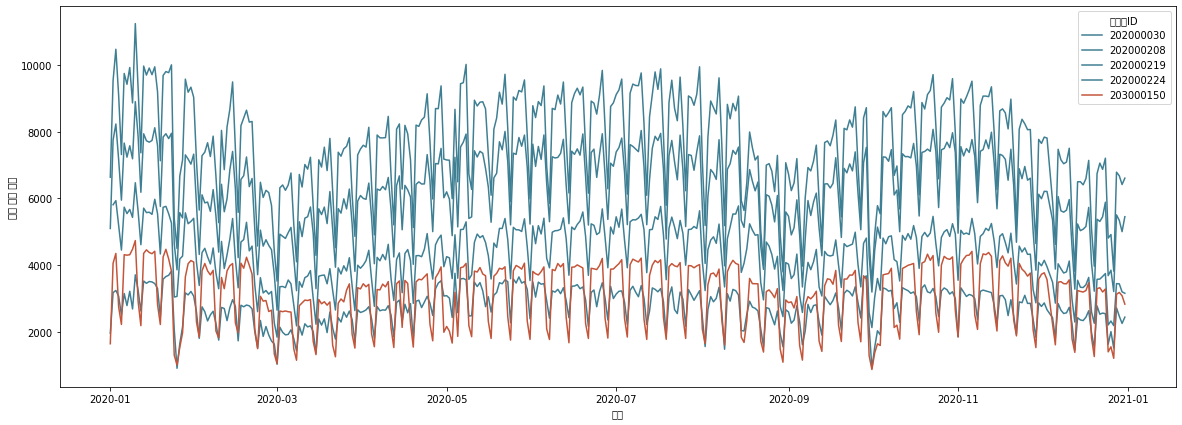

In [122]:
plt.figure(figsize=(20,7))
sns.lineplot(data=f_bus, x="일자", y="전체 승차 건수", hue="정류소ID", palette = sns.diverging_palette(220, 20, as_cmap=True))

In [123]:
f_bus['date'] = f_bus.일자.apply(lambda x : x.weekday())

In [124]:
# weekday() : 0 월 1 화 2 수 3 목 4 금 5 토 6 일 
f_bus["주말"] = f_bus.date.apply(lambda x : 1 if x in [5,6] else 0)

<AxesSubplot:xlabel='일자', ylabel='전체 승차 건수'>

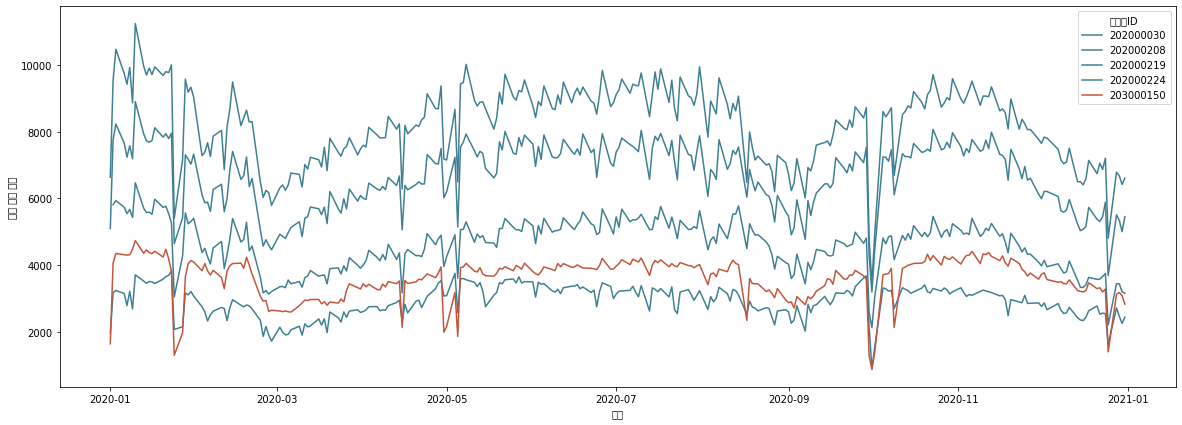

In [125]:
plt.figure(figsize=(20,7))
sns.lineplot(data=f_bus[f_bus["주말"] == 0], x="일자", y="전체 승차 건수", hue="정류소ID", palette = sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='일자', ylabel='전체 승차 건수'>

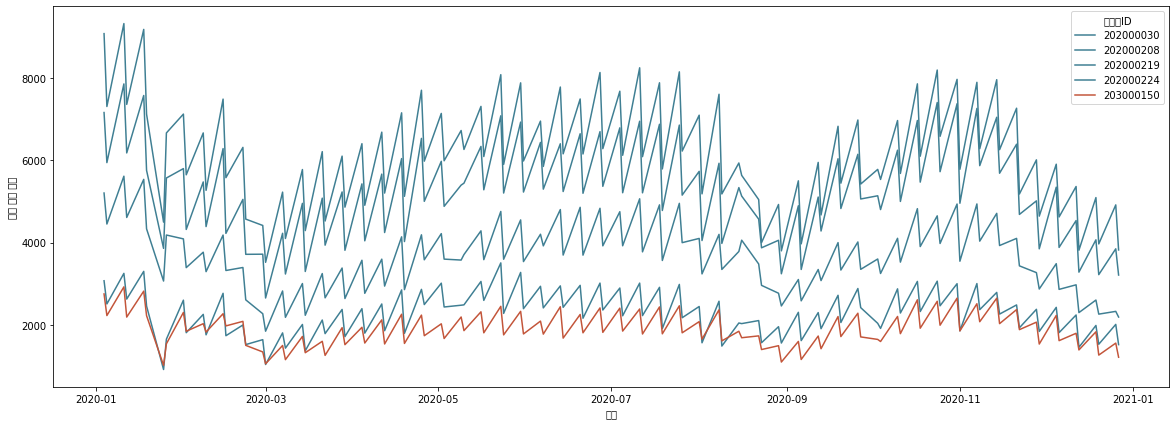

In [126]:
plt.figure(figsize=(20,7))
sns.lineplot(data=f_bus[f_bus["주말"] == 1], x="일자", y="전체 승차 건수", hue="정류소ID", palette = sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='일자', ylabel='전체 승차 건수'>

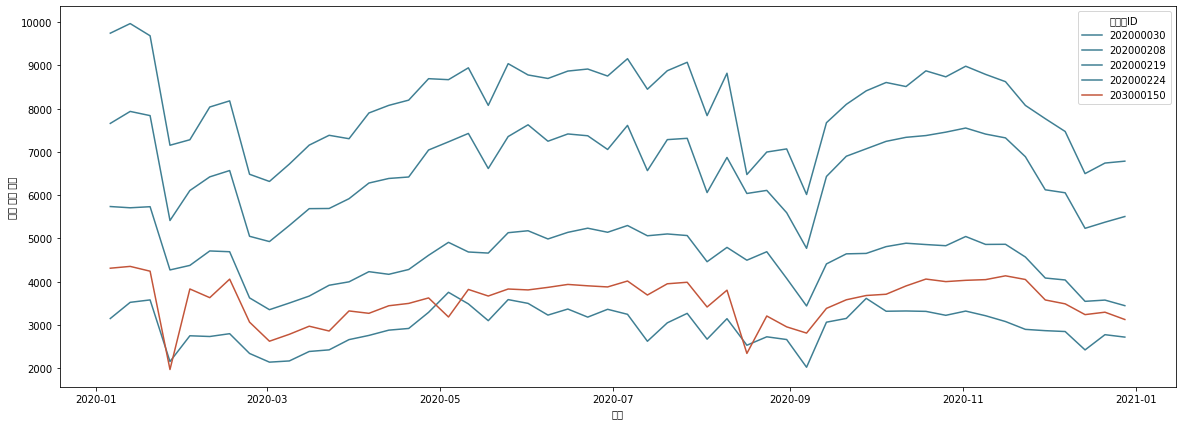

In [127]:
# 월
plt.figure(figsize=(20,7))
sns.lineplot(data=f_bus[f_bus["date"] == 0], x="일자", y="전체 승차 건수", hue="정류소ID", palette = sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='일자', ylabel='전체 승차 건수'>

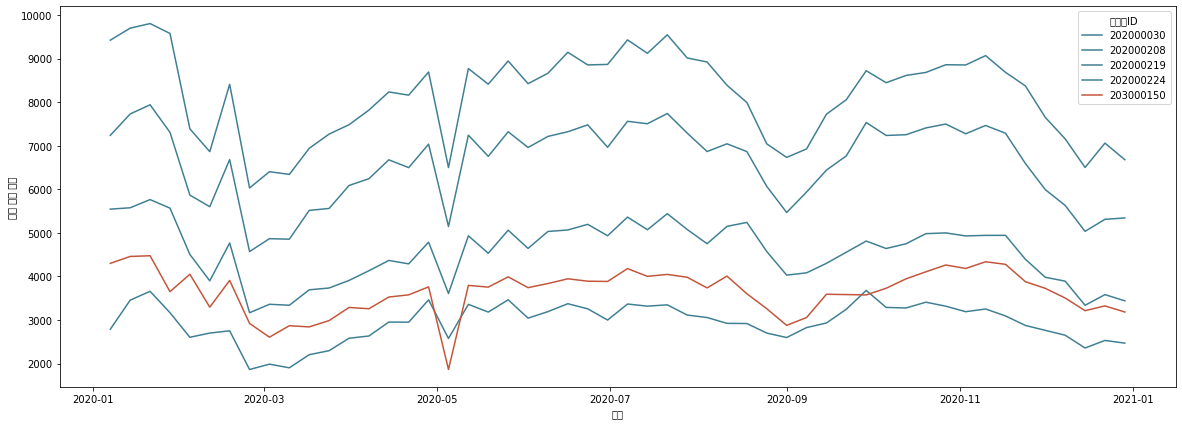

In [128]:
# 화
plt.figure(figsize=(20,7))
sns.lineplot(data=f_bus[f_bus["date"] == 1], x="일자", y="전체 승차 건수", hue="정류소ID", palette = sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='일자', ylabel='전체 승차 건수'>

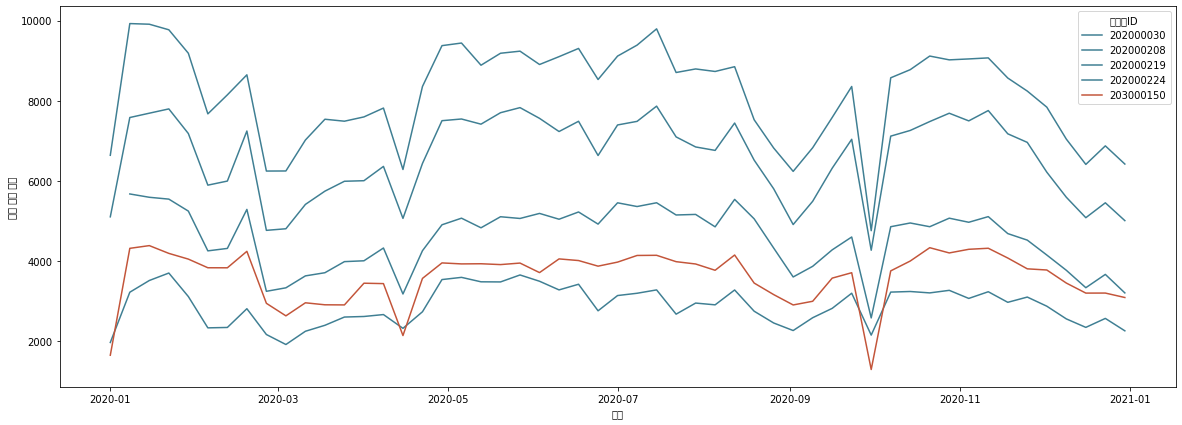

In [129]:
# 수
plt.figure(figsize=(20,7))
sns.lineplot(data=f_bus[f_bus["date"] == 2], x="일자", y="전체 승차 건수", hue="정류소ID", palette = sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='일자', ylabel='전체 승차 건수'>

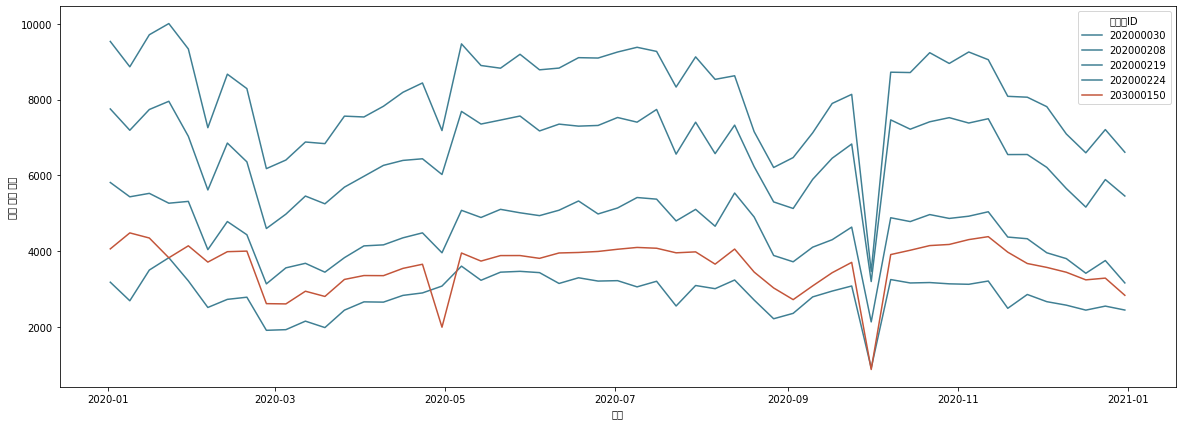

In [130]:
# 목
plt.figure(figsize=(20,7))
sns.lineplot(data=f_bus[f_bus["date"] == 3], x="일자", y="전체 승차 건수", hue="정류소ID", palette = sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='일자', ylabel='전체 승차 건수'>

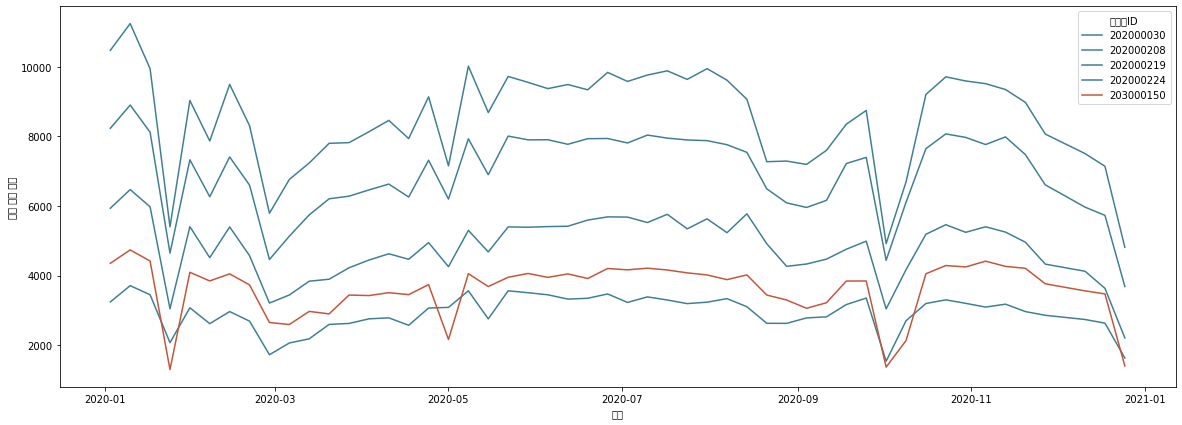

In [131]:
# 금
plt.figure(figsize=(20,7))
sns.lineplot(data=f_bus[f_bus["date"] == 4], x="일자", y="전체 승차 건수", hue="정류소ID", palette = sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='일자', ylabel='전체 승차 건수'>

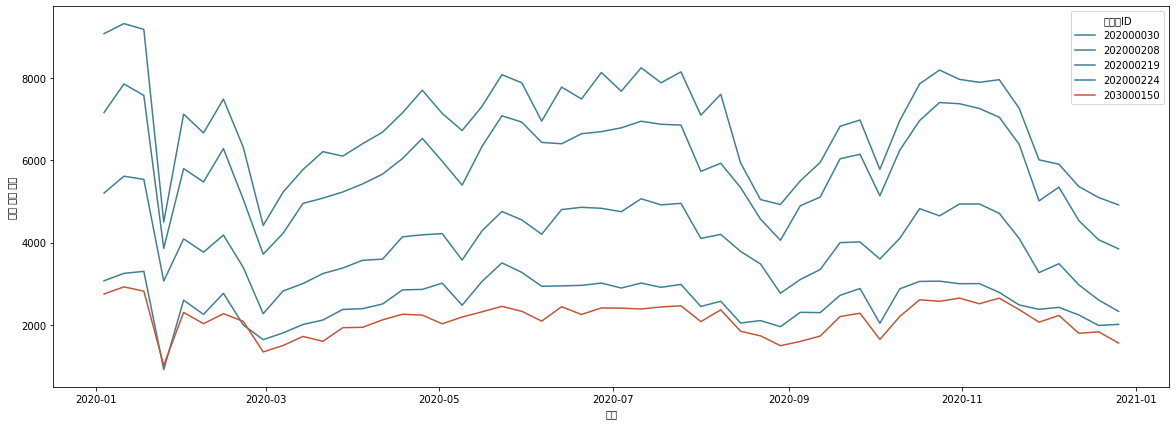

In [132]:
# 토
plt.figure(figsize=(20,7))
sns.lineplot(data=f_bus[f_bus["date"] == 5], x="일자", y="전체 승차 건수", hue="정류소ID", palette = sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='일자', ylabel='전체 승차 건수'>

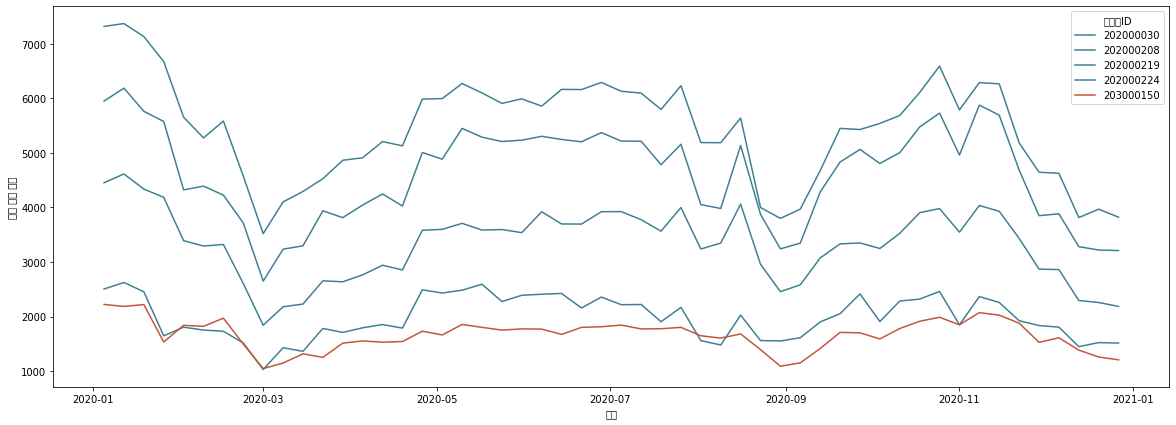

In [133]:
# 일
plt.figure(figsize=(20,7))
sns.lineplot(data=f_bus[f_bus["date"] == 6], x="일자", y="전체 승차 건수", hue="정류소ID", palette = sns.diverging_palette(220, 20, as_cmap=True))

In [32]:
bus_total_date.to_excel(current_path+'/data/bus_total_date.xlsx')